# Linear Regression Assignment

### Importing Needed Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the Data

In [2]:
df = pd.read_csv("bottle1.csv")
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,25.649,3,1.0,...,9.0,9.0,0,10.50,10.50,33.440,25.64,233.0,0.00,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,25.656,3,2.0,...,9.0,9.0,8,10.46,10.46,33.440,25.65,232.5,0.01,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,25.654,7,2.0,...,9.0,9.0,10,10.46,10.46,33.437,25.65,232.8,0.02,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,25.643,3,2.0,...,9.0,9.0,19,10.45,10.45,33.420,25.64,234.1,0.04,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,25.643,7,2.0,...,9.0,9.0,20,10.45,10.45,33.421,25.64,234.0,0.04,20


In [3]:
cdf = df[['Salnty','T_degC']]
cdf.head(10)

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
5,33.431,10.45
6,33.440,10.45
7,33.424,10.24
8,33.420,10.06
9,33.494,9.86


In [4]:
# Limiting amount of entries to speed up regression time
cdf = cdf[:][:500]
len(cdf)

500

### Plotting Salinity v/s Temperature to see how linear their relation is:

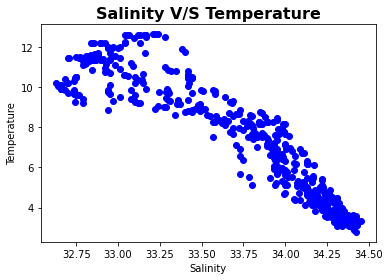

In [5]:
#SCATTER PLOT
plt.scatter(cdf.Salnty, cdf.T_degC,  color='blue')
plt.title("Salinity V/S Temperature",fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

### Creating Test and Train Dataset

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. 

In [6]:
# Eliminating NaN or missing input numbers and filling it
cdf.fillna(method='ffill', inplace=True)

In [7]:
X = np.asarray(cdf['Salnty']).reshape(-1,1)
X[0:5]

array([[33.44 ],
       [33.44 ],
       [33.437],
       [33.42 ],
       [33.421]])

In [8]:
y = np.asarray(cdf['T_degC']).reshape(-1,1)
y[0:5]

array([[10.5 ],
       [10.46],
       [10.46],
       [10.45],
       [10.45]])

In [9]:
# Pandas dropna() allows the user to analyze and drop Rows/Columns with Null values in different ways.
cdf.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size=0.2, random_state=4)
print('Train size: ',X_train.shape, y_train.shape)
print('Test size: ',X_test.shape, y_test.shape)

Train size:  (400, 1) (400, 1)
Test size:  (100, 1) (100, 1)


### Train Data Distribution/Model:

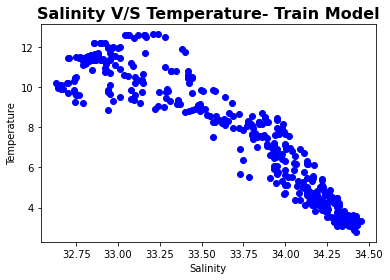

In [11]:
plt.scatter(X_train, y_train,  color='blue')
plt.title("Salinity V/S Temperature- Train Model",fontdict={'fontweight':'bold','fontsize':16})
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

### Modeling using sklearn package:

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit (X_train, y_train)   # Best fit line for the regression model

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-4.80751898]]
Intercept:  [169.5151324]


### Predicting Values

In [13]:
y_pred = regr.predict(X_test)
y_pred[0:5]

array([[12.405412  ],
       [11.54005858],
       [12.06888567],
       [11.78043453],
       [12.11696086]])

### Plot Outputs of the new model

Text(0, 0.5, 'Temperature')

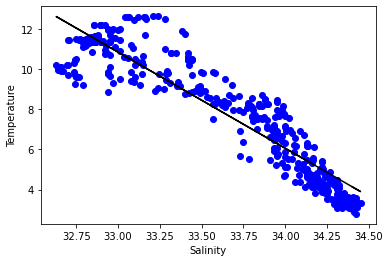

In [14]:
# PLOTTING THE BEST FIT LINE
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regr.coef_[0][0]* X_train + regr.intercept_[0],'-k')  # This is the equation for the best fit line
plt.xlabel("Salinity")
plt.ylabel("Temperature")

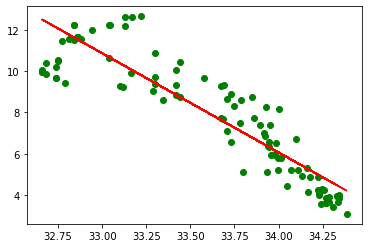

In [17]:
# GRAPH FOR THE PREDICTED VALUES OF y (Test Set):
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='r')
plt.show()

### Accuracy

In [15]:
acc = regr.score(X_test, y_test)
print(acc)

0.8093114854419466


### Evaluation

In [16]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 0.98
Residual sum of squares (MSE): 1.55
R2-score: 0.78


# THE END